## Importing the libraries

In [494]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from astropy.io import ascii

## Importing the dataset

In [495]:
from Preprocessor4 import get_combined_dataset
from Preprocessor4 import get_single_dataset
training_set = get_combined_dataset("training_data/Typ2_FFT20Pkt/training", 4, 12)
X_train = training_set.iloc[:, [1,2,3]].values
y_train = training_set.iloc[:, 4].values
test_set = get_combined_dataset("training_data/Typ2_FFT20Pkt/training", 1, 3)
X_test = test_set.iloc[:, [1,2,3]].values
y_test = test_set.iloc[:, 4].values

## Training the Neural Network model

In [496]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential(
    [
        layers.Dense(10, activation="relu", kernel_initializer='he_normal', input_shape=(3,), name="layer1"),
        layers.Dense(8, activation="relu", kernel_initializer='he_normal', name="layer2"),
        layers.Dense(1, name="layer3"),
    ]
)
model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.01))

In [497]:
model.fit(X_train, y_train, batch_size=256, epochs=200)

Epoch 1/200
104/104 [==============================] - 0s 822us/step - loss: 5.6260
Epoch 2/200
104/104 [==============================] - 0s 822us/step - loss: 0.1988
Epoch 3/200
104/104 [==============================] - 0s 822us/step - loss: 0.2564
Epoch 4/200
104/104 [==============================] - 0s 758us/step - loss: 0.3568
Epoch 5/200
104/104 [==============================] - 0s 670us/step - loss: 0.1828
Epoch 6/200
104/104 [==============================] - 0s 822us/step - loss: 0.2237
Epoch 7/200
104/104 [==============================] - 0s 670us/step - loss: 0.2562
Epoch 8/200
104/104 [==============================] - 0s 821us/step - loss: 0.1908
Epoch 9/200
104/104 [==============================] - 0s 758us/step - loss: 0.1190
Epoch 10/200
104/104 [==============================] - 0s 670us/step - loss: 0.0880
Epoch 11/200
104/104 [==============================] - 0s 822us/step - loss: 0.1190
Epoch 12/200
104/104 [==============================] - 0s 670us/step - lo

## Predicting the Test set results on independent test set

In [498]:
y_pred = model.predict(X_test)

In [499]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.00350830092809842


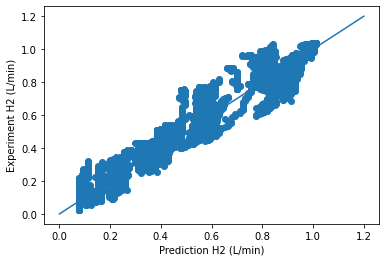

In [500]:
plt.scatter(y_pred, y_test)
plt.xlabel("Prediction H2 (L/min)")
plt.ylabel("Experiment H2 (L/min)")
plt.plot([0, 1.2], [0, 1.2])
plt.show()

In [501]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9579541662679228

In [502]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(rmse)

0.05923091193032925


In [503]:
from sklearn.metrics import mean_absolute_error
mape = mean_absolute_error(y_test, y_pred)*100
print(mape)

3.7747776678031366


In [504]:
np.savetxt("nn2_test_train2test2.txt", y_test)

In [505]:
np.savetxt("nn2_pred_train2test2.txt", y_pred)